# EXERCISE 4: NEURAL NETWORKS LEARNING

*This is the programming assignment for **week 5** of the Stanford University **Machine Learning** course on coursera.org*

## Before you start

Read the original assignment document (ex4.pdf), this will guide you through the assignment.
Note that the PDF is the orginal document for the course which assumes you will be implementing the assignment in Matlab/Octave. 

Do not change any code in this nodebook file; your job is to implement the following:
- Task 1: nnCostFunction.py
- Task 2: add regularization to nnCostFunction.py
- Task 3: sigmoidGradient.py
- Task 4: randInitializeWeights.py
- Task 5: add partial derivates to nnCostFunction.py
- Task 6: predict.py

Variable conventions:
- ``m`` : number of training examples (rows in the dataset) - scalar value
- ``n`` : number of features in the data (columns in the dataset, excluding the column with result values) - scalar value
- ``X_data`` : m x n matrix representing all input data - 2D array
- ``X`` : m x (n+1) design matrix, basically X_data preprended with a column of ones - 2D array
- ``y`` : m element result vector - 1D array
- ``theta`` : n+1 element fitting parameter vector - 1D array

In [1]:
# 3rd party libraries
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt

# pre-defined functions 
from printDim import printDim
from displayData import displayData
from checkNNGradients import checkNNGradients
from debugInitializeWeights import debugInitializeWeights
from computeNumericalGradient import computeNumericalGradient

# user defined functions; you will be implementing these 
from nnCostFunction import nnCostFunction
from nnCostFunction1 import nnCostFunction1
from nnCostFunction2 import nnCostFunction2
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from predict import predict

In [2]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10   
                         # (note that we have mapped "0" to label 10)

## Part 1: Loading and Visualizing Data 

We start the exercise by first loading and visualizing the dataset. 
You will be working with a dataset that contains handwritten digits.

*(no tasks)*

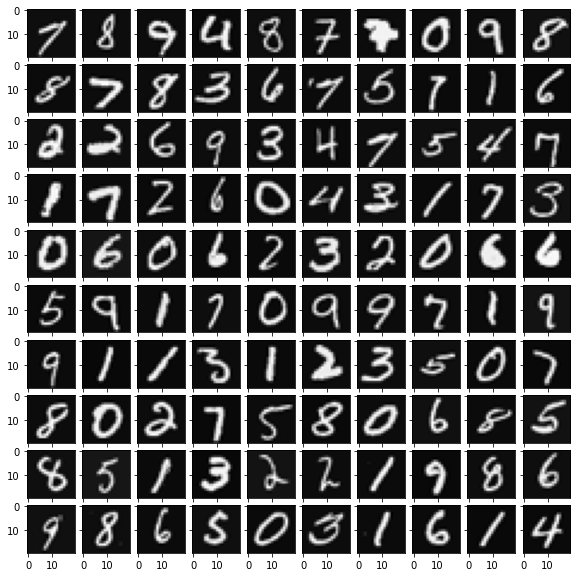

In [3]:
# load data
data = loadmat('ex4data1.mat')
X_data = data['X']
y = data['y'][:, -1]

# determine number of examples
m = X_data.shape[0]

# select 100 random examples of X
sampleSize = 100
selection = X_data[np.random.choice(m, sampleSize, replace=False), :]

# display these 100 random examples in a grid
noColumns = 10
displayData(selection, noColumns, (20, 20))

# Part 2: Loading Parameters 
In this part of the exercise, we load some pre-initialized neural network parameters.

*(no tasks)*

In [4]:
data = loadmat('ex4weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']

# printDim(Theta1, 'Theta1')
# printDim(Theta2, 'Theta2')

# Unroll parameters 
nn_params = np.append(Theta1.flatten(), Theta2.flatten())
# printDim(nn_params, 'nn_params')

# Part 3: Compute Cost - without regularization (feed forward) 
To the neural network, you should first start by implementing the feedforward part of the neural network that returns the cost only. 
You should complete the code in nnCostFunction.py to return cost. 

After implementing the feedforward to compute the cost, you can verify that your implementation is correct 
by verifying that you get the same cost as us for the fixed debugging parameters.

We suggest implementing the feedforward cost *without* regularization first so that it will be easier for you to debug. 
Later, in part 4, you will get to implement the regularized cost

<u>Task 1</u>: implement nnCostFunction.py

In [5]:
# Weight regularization parameter (we set this to 0 here).
llambda = 0

# calculate the cost for the entire neural network
(J, grad) = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X_data, y, llambda)
J # cost at theta parameters loaded from ex4weights, *without* regularization

0.28762916516131876

*(expected cost (approx.): 0.287629)*

# Part 4: Compute Cost - with regularization 

Once your cost function implementation is correct, you should now continue to implement the regularization with the cost.

<u>Task 2</u>: add regularization to nnCostFunction.py

In [6]:
llambda = 1

(J, grad) = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X_data, y, llambda)
J # cost at theta parameters loaded from ex4weights, *with* regularization

0.3837698590909235

*(expected cost (approx.): 0.383770)*

# Part 5: Sigmoid Gradient 

Before you start implementing the neural network, you will first implement the gradient for the sigmoid function. 

<u>Task 3</u>: implement sigmoidGradient.py

In [7]:
# For large values (both positive and negative) of z, the gradient should be close to 0. 
# When z = 0, the gradient should be exactly 0.25. 
g = sigmoidGradient( np.array([-1, -0.5, 0, 0.5, 1]) )
g

array([0.19661193, 0.23500371, 0.25      , 0.23500371, 0.19661193])

# Part 6: Initializing Pameters 

In this part of the exercise, you will be starting to implement a two layer neural network that classifies digits. 

<u>Task 4</u>: implement randInitializeWeights.py

In [8]:
# Initializing Neural Network Parameters 
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
#printDim(initial_Theta1, 'initial_Theta1')

initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
#printDim(initial_Theta2, 'initial_Theta2')

# Unroll parameters into a 1D vector
initial_nn_params = np.append(initial_Theta1.flatten(), initial_Theta2.flatten())

# Part 7: Compute gradient - without regularization (backpropagation)

Once your cost matches up with ours, you should proceed to implement the backpropagation algorithm for the neural network. 
You should add your code to nnCostFunction.py to return the partial derivatives of the parameters.

<u>Task 5</u>: add partial derivates to nnCostFunction.py

In [9]:
#  Check gradients by running checkNNGradients
checkNNGradients()

Numerical Gradient       Analytical Gradient
2.8383184691449515e-05   2.838318795382669e-05
0.0001540102179120595    0.0001540102155570382
0.0004412979470735934    0.0004412979465882461
0.00032285838003076606   0.000322858380675971
0.0008000839013533323    0.0008000839034693133
0.0002456484216040167    0.00024564842185084484
0.0003892400224358994    0.000389240023517967
0.00017496614379552966   0.00017496614263500806
-0.002644809895535616    -0.002644809899140686
-0.00029192384953802275  -0.0002919238506639142
0.00024311816115840656   0.00024311816212281041
0.0005546384573840157    0.0005546384578506715
-0.002312306379703699    -0.002312306379408663
-0.00021125534210852948  -0.00021125534212601012
0.00034176947716346717   0.000341769477469734
0.0005805730163288558    0.0005805730156305032
-0.0017960278442252786   -0.0017960278440286234
-0.0001138126459743205   -0.00011381264664858063
0.00041312829157647      0.00041312829143803616
0.0005602409824945198    0.0005602409836152521
0.114052

# Part 8: Compute gradient - with regularization

Once your backpropagation implementation is correct, you should now continue to implement the regularization with the cost and gradient

In [10]:
#  Check gradients by running checkNNGradients
llambda = 3
checkNNGradients(llambda)

Numerical Gradient       Analytical Gradient
2.8383184691449515e-05   2.838318795382669e-05
-0.045254139500183754    -0.04525413950291865
0.05980279274453437      0.059802792743991154
-0.031871516699144564    -0.03187151669935012
0.0008000839013533323    0.0008000839034693133
0.050733907510647214     0.050733907510324625
-0.05714621645669382     -0.05714621645627034
0.024902075257404732     0.024902075257140402
-0.002644809895535616    -0.002644809899140686
-0.05797577336208448     -0.05797577336343732
0.0548009637713065       0.05480096377166373
-0.01621029143583641     -0.016210291434084884
-0.002312306379703699    -0.002312306379408663
0.05922518599987825      0.05922518599956621
-0.04471746532841436     -0.04471746532883084
0.009047773499304412     0.009047773499222537
-0.0017960278442252786   -0.0017960278440286234
-0.06011322503995942     -0.060113225039690785
0.03943039870168974      0.03943039870086505
0.009552873563301034     0.009552873563392393
0.11405284848109432      0.114

In [11]:
# Output the costFunction debugging values
(debug_J, _)  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X_data, y, llambda);
debug_J 

0.5760512469501329

*(expected value (approx.): 0.576051)* 

# Part 9: Training NN 

You have now implemented all the code necessary to train a neural network. 
To train your neural network, we will now use "fmincg", which is a function which works similarly to "fminunc". 

Recall that these advanced optimizers are able to train our cost functions efficiently as long as we provide them with the gradient computations.

In [12]:
# Training Neural Network
# (After you have completed the assignment, change the MaxIter to a larger value to see how more training helps.)
maxiter = 50

#  You should also try different values of lambda
llambda = 1

# optimize the neural network parameters
myargs = (input_layer_size, hidden_layer_size, num_labels, X_data, y, llambda)
opt_result = opt.fmin_cg(nnCostFunction1, fprime=nnCostFunction2, x0=initial_nn_params, args=myargs, maxiter=maxiter, full_output=True )
nn_params = opt_result[0]

# Obtain Theta1 and Theta2 back from nn_params
Theta1_1d = nn_params[: hidden_layer_size * (input_layer_size + 1)]
Theta1 = np.reshape(Theta1_1d, (hidden_layer_size, input_layer_size + 1))

Theta2_1d = nn_params[hidden_layer_size * (input_layer_size + 1):]
Theta2 = np.reshape(Theta2_1d, (num_labels, hidden_layer_size + 1))

# display cost
opt_result[1]

         Current function value: 0.432971
         Iterations: 50
         Function evaluations: 108
         Gradient evaluations: 108


0.43297064961869264

# Part 10: Visualize Weights 

You can now "visualize" what the neural network is learning by displaying the hidden units to see what features they are capturing in the data.

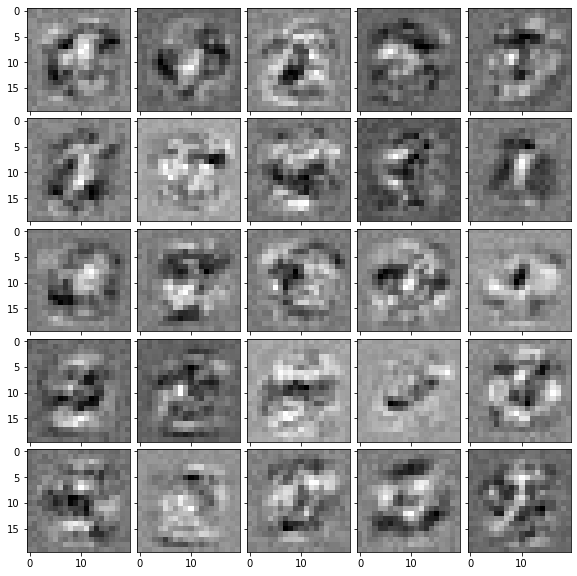

In [13]:
# Visualizing Neural Network parameters - layer 1
displayData(Theta1[:, 1:], 5, (20,20))

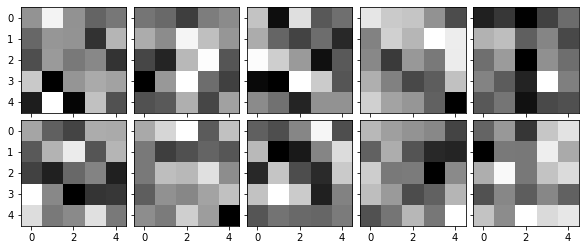

In [14]:
# Visualizing Neural Network parameters - layer 2
displayData(Theta2[:, 1:], 5, (5,5))

# Part 11: Implement Predict 

After training the neural network, we would like to use it to predict the labels. You will now implement the "predict" function to use the
neural network to predict the labels of the training set. This lets you compute the training set accuracy.

<u>Task 6</u>: implement predict.py

In [15]:
pred = predict(Theta1, Theta2, X_data)

accuracy = np.mean(np.double(pred == y)) * 100
accuracy

96.46000000000001

*(expected accuracy: 95.3 - with a variation of +/- 1 due to the random initialization)*